# Descrição da escolha dos dados

1. Correlação entre média final aluno e avaliação do professor 
2. Correlação entre número de faltas e média final do aluno
3. Correlação entre emprestimos de livros e média final do aluno
4. Verificar se as disciplinas com menor indice de aprovação e médias possuem atendimento extra aula (monitorias)

# 4 - Relação das disciplinas com baixos indices de aprovação e atendimento extra aula no curso de Tecnologia da Informação


## 4.1 - Bases utilizadas
  Utilizamos as seguintes bases de dados
  1. Componente Curricular Presencial
  2. Turmas
  3. Matriculas em compontes
  4. Projeto de Ensino



### 4.1.1 - Analise dos datasets
1. Componente Curricular Presencial
  - id_componente
  - nome
2. Turmas
  - id_turma
  - id_componente
  - periodo
3. Matricular em Componentes
  - discente
  - id_turma
  - id_curso
  - media_final
  - situacao
4. Projeto de Ensino
  - tipo_projeto
  - data_inicio
  - data_fim
  - ids_disciplinas_envolvidas
  
  


### 4.1.2 - Importação das bibliotecas e libs


In [0]:
# imports
import pandas as pd

### 4.1.3 - Leitura das bases de dados utilizadas

In [0]:
# leitura das bases de dados
# urls para acessar data sets
url_mat = "http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/55dfe713-ff7c-4fa8-8d1d-d4294a025bff/download/matricula-componente-20172.csv"
url_cursos = "http://dados.ufrn.br/dataset/02526b96-cf40-4507-90b0-3afe5ddd53e7/resource/a10bc434-9a2d-491a-ae8c-41cf643c35bc/download/cursos-de-graduacao.csv"
url_componentes = "http://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/9a3521d2-4bc5-4fda-93f0-f701c8a20727/download/componentes-curriculares-presenciais.csv"
url_turmas = "http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/01fe7343-fdf0-4a67-b915-2386b7c2fecb/download/turmas-2017.2.csv"
url_projeto_ensino = "http://dados.ufrn.br/dataset/4b7f0d33-adbb-4e83-abcd-1832147cf3cc/resource/763b4815-f27a-4058-9467-a75388bc9c4e/download/projetoensino.csv"

# matriculas
matriculas = pd.read_csv(url_mat, sep=';').loc[:, ["id_turma", "discente", "id_curso", "media_final", "descricao"]]

# cursos
cursos = pd.read_csv(url_cursos, sep=';').loc[:, ["id_curso", "nome"]]

# componentes 
componentes = pd.read_csv(url_componentes, sep=";", error_bad_lines=False, low_memory=False).loc[:, ["id_componente", "nome"]]

# turmas
turmas = pd.read_csv(url_turmas, sep=';').loc[:, ['id_turma', 'id_componente_curricular', 'ano', 'periodo']]

# projeto de ensino
projeto_ensino = pd.read_csv(url_projeto_ensino, sep=';')


## 4.2 - Limpeza das bases de dados


### 4.2.1 - Selecionar Curso de TI

In [0]:
# código do curso de Tecnologia da informação
cod_curso_ti = int(cursos[cursos.nome == 'TECNOLOGIA DA INFORMAÇÃO'].id_curso.values)
print(cod_curso_ti)

92127264


### 4.2.2 - Matriculas em componentes


In [0]:
# limpeza dos dados
# removendo duplicações de matriculas
matriculas = matriculas.drop_duplicates()

# limpando valores null
matriculas = matriculas.dropna()

# selecionando matriculas de um curso específico
# caso de estudo: curso Tecnologia da Informação
#matriculas = matriculas[matriculas["id_curso"] == cod_curso_ti]

# ordenando pela media_final
matriculas = matriculas.sort_values("media_final", ascending=False)

# exibindo informações sobre matriculas
matriculas.info()
matriculas.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148722 entries, 348347 to 632451
Data columns (total 5 columns):
id_turma       148722 non-null int64
discente       148722 non-null object
id_curso       148722 non-null float64
media_final    148722 non-null float64
descricao      148722 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ MB


,id_turma,discente,id_curso,media_final,descricao
348347,57606816,52b87b501ee337837bb9cd10f1cbd15d,2000018.0,10.0,APROVADO
441970,57607300,4c3828cb1430a0d76485566a052e235a,50913238.0,10.0,APROVADO
441389,57603762,260977e5598b86dd5f04efb71d600ec2,2000066.0,10.0,APROVADO
441391,57603762,1ac0fcfff1be3fc070d1df4584e776f7,2000066.0,10.0,APROVADO
299051,57612550,dbb144ec4997ef37272992deb527a315,125836411.0,10.0,APROVADO


## 4.3 - Filtrando dados


### 4.3.1 - Acessando lista de turmas com as porcentagens de aprovação

In [242]:
# buscando aprovados e aprovados por notas
# filtro
filtro_aprovados = ["APROVADO POR NOTA", "APROVADO"]
is_aprovado = matriculas.descricao.isin(filtro_aprovados)

# filtragem
aprovados = matriculas[is_aprovado]

# agrupando matriculas por turmas
turmas_ti = pd.Series(matriculas.loc[:, 'id_turma'].unique()).sort_values()

# listas para obtenção dos dados
indice = list()
total_alunos = list()
num_aprovados = list()

for key, turma  in turmas_ti.items():
  # calculo da porcentagem de aprovacao
  indice_total = matriculas[matriculas.id_turma == turma].descricao.count().sum()
  total_aprovados = aprovados[aprovados.id_turma == turma].descricao.count().sum()
  indice_aprovados = round((total_aprovados / indice_total) * 100, 2)
  discentes = matriculas[matriculas.id_turma == turma].discente.count().sum()
  
  total_alunos.insert(key, discentes)
  num_aprovados.insert(key, total_aprovados)
  indice.insert(key, indice_aprovados)   

# dicionario com as listas
data = {
  'turma': turmas_ti,
  'total_alunos': total_alunos,
  'aprovados': num_aprovados,
  'indice_aprovacao': indice 
}

# dataframe
indice_turmas = pd.DataFrame(data=data)

indice_turmas.info()
indice_turmas.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7618 entries, 6555 to 7541
Data columns (total 4 columns):
turma               7618 non-null int64
total_alunos        7618 non-null int64
aprovados           7618 non-null int64
indice_aprovacao    7618 non-null float64
dtypes: float64(1), int64(3)
memory usage: 297.6 KB


,turma,total_alunos,aprovados,indice_aprovacao
6555,57602445,24,24,100.00
6577,57602446,151,112,74.17
6672,57602448,85,79,92.94
6654,57602450,30,28,93.33
6653,57602451,84,76,90.48


### 4.3.2 - Removendo turmas com quantidades de alunos irrelevante

In [243]:
# removendo outliers
indice_turmas = indice_turmas[indice_turmas.total_alunos >= 10]

# resetando index e ordenando por indice de aprovacao
indice_turmas = indice_turmas.sort_values('indice_aprovacao', ascending=False)
indice_turmas = indice_turmas.reset_index(drop=True)

indice_turmas.info()
indice_turmas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4648 entries, 0 to 4647
Data columns (total 4 columns):
turma               4648 non-null int64
total_alunos        4648 non-null int64
aprovados           4648 non-null int64
indice_aprovacao    4648 non-null float64
dtypes: float64(1), int64(3)
memory usage: 145.3 KB


,turma,total_alunos,aprovados,indice_aprovacao
0,57602445,24,24,100.0
1,57609924,17,17,100.0
2,57608688,17,17,100.0
3,57605703,10,10,100.0
4,57605699,28,28,100.0


### 4.3.3 - Selecionando turmas com maiores e menores indices
  Vamos selecionar as turmas com maiores e menores indices de aprovação, ficando num range de 25 para cada.

In [244]:
# menores
menores_indices = indice_turmas.tail(20)

# maiores
maiores_indices = indice_turmas.head(20)

print(menores_indices)
print(maiores_indices)

         turma  total_alunos  aprovados  indice_aprovacao
4628  57604437            12          0               0.0
4629  57612518            42          0               0.0
4630  57612520            64          0               0.0
4631  57608094            34          0               0.0
4632  57612633            40          0               0.0
4633  57609482            13          0               0.0
4634  57611627            43          0               0.0
4635  57612598            39          0               0.0
4636  57612592            39          0               0.0
4637  57611899            31          0               0.0
4638  57611848            39          0               0.0
4639  57611688            47          0               0.0
4640  57608038            13          0               0.0
4641  57605945            15          0               0.0
4642  57609172            10          0               0.0
4643  57604090            12          0               0.0
4644  57611415

## 4.4 - Relacionando dados
Vamos relacionar os dados dos componentes curriculares e as turmas nessa sessão

### 4.4.1 - Acessando componentes curriculares através de turmas

In [245]:
turmas.info()

filtro_turma = turmas.id_turma.isin(indice_turmas.turma)
turmas_ti_2017_2 = turmas[filtro_turma]

turmas_ti_2017_2.info()
turmas_ti_2017_2 = turmas_ti_2017_2.sort_values('id_turma')
turmas_ti_2017_2 = turmas_ti_2017_2.reset_index(drop=True)
turmas_ti_2017_2.head()

analise = turmas_ti_2017_2.merge(indice_turmas, how='inner', left_on='id_turma', right_on='turma', right_index=False)
analise.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14472 entries, 0 to 14471
Data columns (total 4 columns):
id_turma                    14472 non-null int64
id_componente_curricular    14472 non-null int64
ano                         14472 non-null int64
periodo                     14472 non-null int64
dtypes: int64(4)
memory usage: 452.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8223 entries, 0 to 14465
Data columns (total 4 columns):
id_turma                    8223 non-null int64
id_componente_curricular    8223 non-null int64
ano                         8223 non-null int64
periodo                     8223 non-null int64
dtypes: int64(4)
memory usage: 321.2 KB


,id_turma,id_componente_curricular,ano,periodo,turma,total_alunos,aprovados,indice_aprovacao
0,57602445,63499,2017,2,57602445,24,24,100.00
1,57602445,63499,2017,2,57602445,24,24,100.00
2,57602446,63503,2017,2,57602446,151,112,74.17
3,57602448,63320,2017,2,57602448,85,79,92.94
4,57602450,63505,2017,2,57602450,30,28,93.33


### 4.4.2 - Preparando monitorias

In [199]:
#Limpando...
projeto_ensino = projeto_ensino.dropna()

#Dividir as disciplinas em um data frame auxiliar
envolvidas = pd.DataFrame({'ids_disciplinas_envolvidas' : [],
                           'id_disciplina'  : []})

def separa(lista):
  global envolvidas
  for valor in lista.split(', '):
    envolvidas = envolvidas.append(pd.DataFrame({'ids_disciplinas_envolvidas': [lista], 'id_disciplina': [int(valor)]}))

projeto_ensino['ids_disciplinas_envolvidas'].apply(lambda x: separa(str(x)))

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
1975    None
1976    None
1977    None
1978    None
1979    None
1980    None
1981    None
1982    None
1983    None
1984    None
1985    None
1986    None
1987    None
1988    None
1989    None
1990    None
1991    None
1992    None
1993    None
1994    None
1995    None
1996    None
1997    None
1998    None
1999    None
2000    None
2001    None
2002    None
2003    None
2004    None
Name: ids_disciplinas_envolvidas, Length: 2004, dtype: object

### Fazendo merge nos dataset's

In [257]:
analise2 = analise.merge(envolvidas, how='inner', left_on='id_componente_curricular', right_on='id_disciplina')
analise3 = analise2.merge(projeto_ensino, how='inner', on='ids_disciplinas_envolvidas')
analise4 = analise3.loc[:, ['id_turma', 'ano', 'periodo', 'turma', 'total_alunos', 'aprovados', 'indice_aprovacao', 'docentes_envolvidos', 'monitores']]
#analise4.head()

final_turmas = indice_turmas.merge(analise4, how='inner', left_on='turma', right_on='turma')
final_turmas = final_turmas.loc[:, ['indice_aprovacao_x', 'ano', 'periodo', 'docentes_envolvidos', 'monitores']]
print(final_turmas.head())

#final_menores = menores_indices.merge(analise4, how='inner', left_on='turma', right_on='turma')
#final_menores = final_menores.loc[:, ['indice_aprovacao_x', 'ano', 'periodo', 'docentes_envolvidos', 'monitores']]
#print(final_menores.head())

#final_maiores = maiores_indices.merge(analise4, how='inner', left_on='turma', right_on='turma')
#final_maiores = final_maiores.loc[:, ['indice_aprovacao_x', 'ano', 'periodo', 'docentes_envolvidos', 'monitores']]
#print(final_maiores.head())

   indice_aprovacao_x   ano  periodo  docentes_envolvidos  monitores
0               100.0  2017        2                    1          0
1               100.0  2017        2                   33         34
2               100.0  2017        2                    3          0
3               100.0  2017        2                    3          9
4               100.0  2017        2                    3          7


## 4.5 Exibindo dados

0.012119487307166502

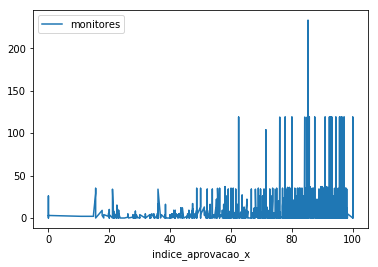

In [260]:
#Grafico e correlação da turma inteira
final_turmas.plot(kind='line', y='monitores', x='indice_aprovacao_x')
final_turmas['monitores'].corr(final_turmas['indice_aprovacao_x'])